In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
% matplotlib inline

In [48]:
def load_data(fname):
    with open(fname, "r") as f:
        # ignore `vertices: ...` at head and `Total: ..` at tail
        raws = f.readlines()[1:-1]
    header = [i.strip() for i in raws[0].split(',')]
    lines = [[j.strip() for j in i.split(',')] for i in raws[1:]]
    t = pd.DataFrame.from_records(lines, columns=header)
    res = t[header].apply(pd.to_numeric, errors='ignore')
    return res[res['order'] > 0]

In [49]:
df = load_data("polys300_pts500/cmp.log")

In [50]:
df.head()

,idx,K,order,dist_ki,dist_edbt,cost_ki,cost_edbt,vnum_ki,vnum_edbt
1,0,5,1.0,1652.50,1652.50,27.332,33210.1,2.0,2.0
2,0,5,2.0,2831.19,2831.19,27.332,33210.1,2.0,2.0
3,0,5,3.0,3387.30,3387.30,27.332,33210.1,5.0,5.0
4,0,5,4.0,3547.90,3547.90,27.332,33210.1,2.0,2.0
6,1,5,1.0,1674.26,1674.26,17.065,70495.3,2.0,2.0


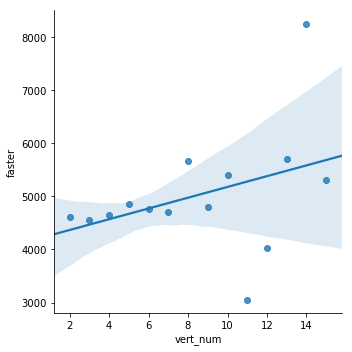

In [86]:
t = pd.DataFrame(data={'ratio': df.cost_edbt / df.cost_ki, 'vnum': df.vnum_ki})
tg = t.groupby(t.vnum)
x = []
y = []
for k, v in tg.ratio.median().items():
    x.append(k)
    y.append(v)

sns.lmplot('vert_num', 'faster', pd.DataFrame({'faster':y, 'vert_num':x}))

In [87]:
ki = df[['K', 'cost_ki']]
edbt = df[['K', 'cost_edbt']]

In [90]:
tg.cost_ki.apply(lambda x: np.average(x))

K
10    43.281608
15    68.053588
20    97.146830
5     20.597502
Name: cost_ki, dtype: float64

In [119]:
tg = ki.groupby('K')
x0 = []
y0 = []
for k, v in tg.cost_ki.apply(lambda _: np.average(_)).items():
    x0.append(int(k))
    y0.append(np.log10(v))
    
tg = edbt.groupby('K')
x1 = []
y1 = []
for k, v in tg.cost_edbt.apply(lambda _: np.average(_)).items():
    x1.append(int(k))
    y1.append(np.log10(v))

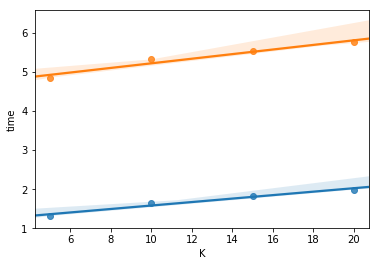

In [120]:
sns.regplot('K', 'time', pd.DataFrame({'time': y0, 'K': x0}))
sns.regplot('K', 'time', pd.DataFrame({'time': y1, 'K': x1}))

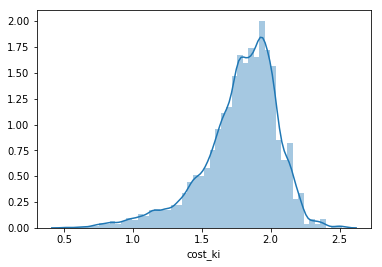

In [52]:
sns.distplot(np.log10(df.cost_ki))

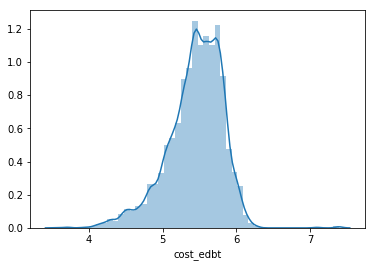

In [53]:
sns.distplot(np.log10(df.cost_edbt))